<h1><center>19AIE303</center></h1>
<h1><center>SIP PROJECT</center></h1>
<h1><center>Face Mask and Social Distance Detection for COVID Protocol Automation</center></h1>

### BY:
### &emsp;&emsp;TEAM 20
#### &emsp; &emsp; P. ADHITHAN &emsp; &emsp;  CB.EN.U4AIE19003
#### &emsp; &emsp; N. KABILAN &nbsp; &emsp; &emsp;  CB.EN.U4AIE19033

## ABSTRACT
COVID-19 pandemic has rapidly affected our day-to-day life disrupting the world trade and movements. Wearing a protective face mask and maintaining proper social distance has become a new normal. This little step of wearing a face mask, following social distancing would save plenty of lives as the spread of the coronavirus could be mitigated. This project consists of social distancing noticing and face mask detection for the events of disease like coronavirus can be solved by maintaining social distancing as well as wearing on its face mask. We have built an application using TensorFlow, Keras, OpenCV and Scikit-Learn. That detects the faces, calculates distance between them and classifies whether the person is wearing mask or not. This System can easily integrated/implemented to various embedded devices with limited computational capacity that uses MobileNetV2 architecture.

## OBJECTIVE
To enforce social distancing and face mask detection, it is important to monitor suspicious scenarios like crowd gathering or tracking or people moving without masks etc. Usage of AI has surpassed traditional methods and can help automate this pattern recognition.
The face mask detection model and the estimation of distance between people have been combined to give the user a risk level based on the parameters.

- If a person is alone and not wearing a mask then it will be <span style="color:green"> No Risk </span> . 
##### If more than one person: 
- If both are apart and wearing a mask then it will be <span style="color:green"> Low Risk  </span> 
- If both are near and wearing a mask then it will be <span style="color:orange"> Risk </span> 
- If both are apart and not wearing a mask then it will be <span style="color:orange"> Risk </span>
- If both are near and not wearing a mask then it will be <span style="color:red"> High Risk </span> 


## METHODOLOGY

In [1]:
#Importing all the necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model

import imutils
from imutils import paths
from imutils.video import VideoStream
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import cv2

### FACE MASK DETECTION
Face mask detection is of two steps, one is Face Detection another is Face Mask Classifier. If any person hasn’t wearing a mask then an alert get triggered in the monitoring screen.
 
  
#### Face Detection
For detecting the face, we used Resnet_SSD pre-defined weights to build a facenet DNN model.
The pre-trained model is based on Single-Shot-Multibox Detector (SSD) and employs a ResNet-10 Architecture as the backbone. The model was trained using web images. OpenCV provides Floating-point 16 version of the original Caffe implementation this face detector:

##### SSD Basic Architecture
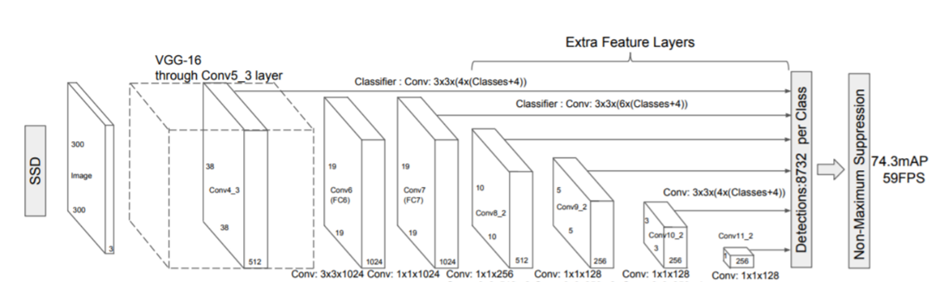
Single-shot MultiBox Detector is a one-stage object detection algorithm. This means that, in contrast to two-stage models, SSDs do not need initial object proposals generation step. This makes it, usually, faster and more efficient. This model will return the array of faces detected on the video frame.


In [2]:
prototxtPath = "face_detector\deploy.prototxt.txt"
weightsPath = "face_detector\Res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

#### Face Mask Classification
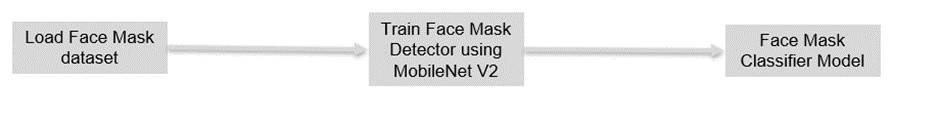

For Classifying faces with and without mask we used MobileNetV2 with ImageNet weights and trained using the dataset to build the model. 

##### Data Preprocessing: 
- The dataset consists of 4092 images of count of with Mask images is 2162 and without Mask images is 1932.The images are resized to 224 x 224 x 3 and the input pixel values are scaled between -1 and 1. 
- Additional data augmentation is done on these parameters - Rotation range = 40, zoom range = 0.2, width shift range = 0.3, height shift range = 0.3, shear range = 0.2, horizontal flip = True, brightness range = (0.5, 1.5)
- Then the data is split into 80% for training and remaining 20% for testing. 

So, after training we will be finally getting face mask classification model.


In [13]:
#Loading the dataset into notebook
path_to_data = "dataset"
imagePaths = list(paths.list_images(path_to_data))

loaded_data = []
yLabels = []

for imagePath in tqdm(imagePaths):

    #Extracting class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    #Loading the input image
    #And changing its size to 224,224
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    image = preprocess_input(image)

    #Updating the loaded_data and yLabels lists
    loaded_data.append(image)
    yLabels.append(label)

#Converting the loaded_data and yLabels to numpy arrays
loaded_data = np.array(loaded_data, dtype="float32")
yLabels = np.array(yLabels)


 83%|████████▎ | 3401/4092 [00:04<00:01, 374.47it/s] C:\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 4092/4092 [00:11<00:00, 369.83it/s]


In [14]:
#To binarize labels in ONE vs ALL fashion
lb = LabelBinarizer()
yLabels = lb.fit_transform(yLabels)
yLabels = to_categorical(yLabels)

In [15]:
#Splitting the training and test dataset
#Test = 20%
#Train = 80%
(trainX, testX, trainY, testY) = train_test_split(loaded_data, yLabels,test_size=0.20, stratify=yLabels, random_state=42)

In [7]:
#For additional data augmentation
aug = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.5),
    fill_mode="nearest")

##### MobileNetV2 Architecture
The typical MobilenetV2 architecture has as many layers listed below, In TensorFlow we can use tensorflow.keras.applications to create the MobileNetV2 model instead of defining/building our own model.

The weights of each layer in the model are predefined based on the ImageNet dataset. The weights indicate the padding, strides, kernel size, input channels and output channels.

##### Why choose MobileNetV2?
Based on ImageNet dataset MobileNetV2 outperforms MobileNetV1 and ShuffleNet (1.5) with comparable model size and computational cost. And also it will perform well for the smaller dataset.
Size of Model after saving as a .hdf5 file : 12 MB
This small size makes it easier for the model to be deployable on most of the platforms with ease.

In [4]:
#Initial mobilenetmodel with the pretrained imagenet weights
InitModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


In [5]:
#Transfer learning
#Adding a few final layers for training
headModel = InitModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [6]:
#Final Model
model = Model(inputs=InitModel.input, outputs=headModel)

In [7]:
learningRate = 1e-4
num_epochs = 20
batch_size = 32

#Setting the initial layers of model as non trainable
for layer in InitModel.layers:
    layer.trainable = False

#Compiling the model
opt = Adam(lr = learningRate, decay = learningRate / num_epochs)
model.compile(loss = "binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
#Train the head of the network
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size, shuffle=True), 
              steps_per_epoch = len(trainX) // batch_size, 
              validation_data = (testX, testY), 
              validation_steps = len(testX) // batch_size,
              epochs = num_epochs)

Epoch 1/20
102/102 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.6285WARNING:tensorflow:From C:\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:5069: calling gather (from tensorflow.python.ops.array_ops) with validate_indices is deprecated and will be removed in a future version.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
102/102 [==============================] - 152s 244ms/step - loss: 0.6870 - accuracy: 0.6285 - val_loss: 0.7690 - val_accuracy: 0.4505
Epoch 2/20
 14/102 [===>..........................] - ETA: 20s - loss: 0.5709 - accuracy: 0.7143

KeyboardInterrupt: 

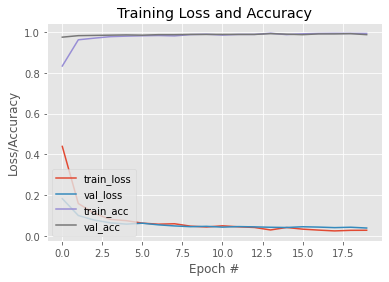

In [46]:
#Plotting the train accuracy
N = num_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

In [16]:
#Saving the model in the hdf5 format
tf.keras.models.save_model(model,'mask_det.hdf5')

In [16]:
#Loading our pretrained fask mask detection model
maskNet = load_model('mask_det.hdf5')

In [17]:
#Predicting the test values 
predIdxs = maskNet.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       433
without_mask       0.98      0.99      0.99       386

    accuracy                           0.99       819
   macro avg       0.99      0.99      0.99       819
weighted avg       0.99      0.99      0.99       819




#### Mask Detection

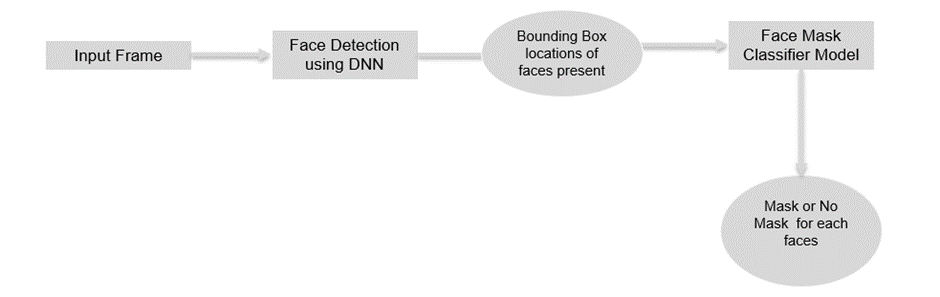
 
  
By combining both Face detection model and the Face mask classification model we get Final Face Mask Detection model. In classification model we will be classifying whether the input face is having the mask or not. In detection model we will detecting faces in the input frame. The output gets displayed with the bounding box across the face, then this crop face is loaded into the face mask classification model.

### SOCIAL DISTANCE DETECTION
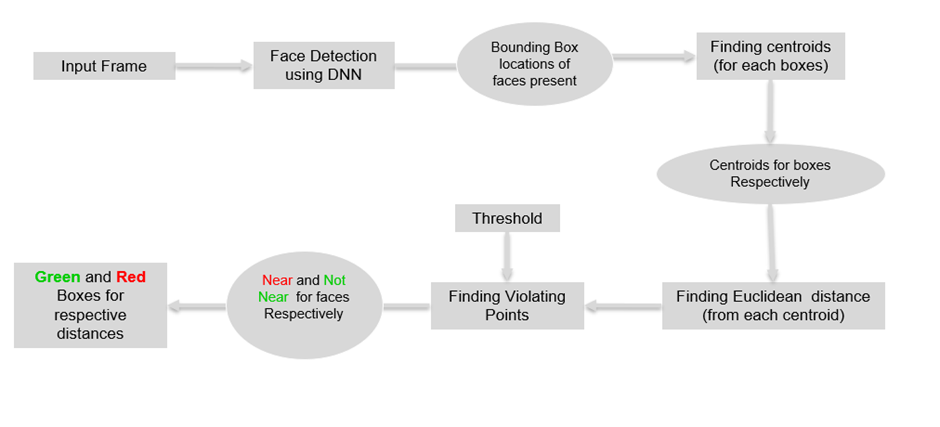
#### Person Detection
For detecting people, we can use many models like YOLO, Mask RCNN, SSD etc. But if we use two detecting models in our work it will be taking more time for detecting the objects and FPS will be less.  So, for making our computation faster we have used the same face detecting model for the person detection. So, by using the previous face detection model we van get the bounding boxes location for the faces.
#### Distance Computing
The model used in this application has a very effectively trained MobileNetV2 for face detection in the video. The model will take the video frame as the input and output a list of coordinates in a bounding box in a rectangular shape across each and every face of the person detected in the frame. The rectangular bounding box is represented as [ x-min, y-min, width, height]. Each and every person in the video frame will have a centroid for the resulting bounding box. The calculation of distance between centroids is done using the Euclidean Distance formula. Euclidean distance is generally used to calculate the distance between any each real valued vectors. 
 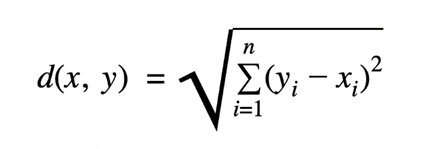
 
 
So, for fixing a threshold we can’t keep it as a fixed one. Like the threshold will vary with the perspective of our seeing. So we have to change the threshold wrt position of the camera.
So after fixing the threshold we can find the centroids (people) who are violating the social distancing. So we can give the factors like Near and Not Near.


### COMBINING MASK DETECTION and SOCIAL DISTANCE DETECTION

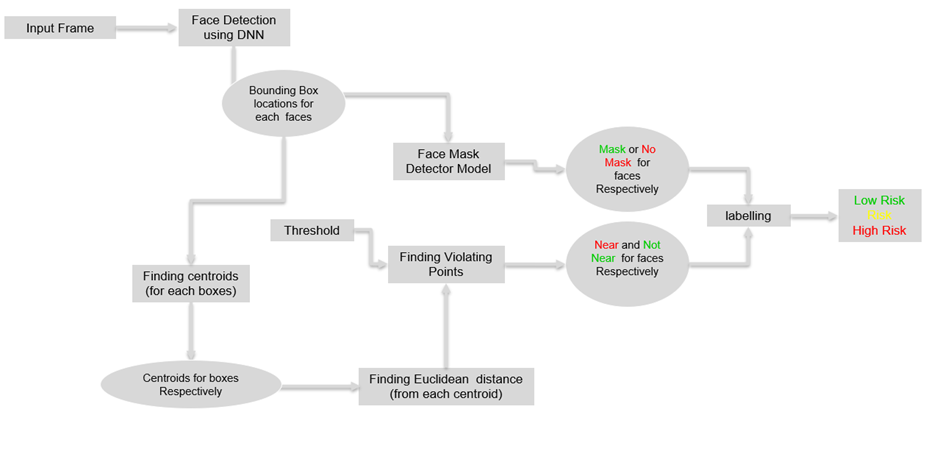

The model will take the video frame as the input and output a list of coordinates in a bounding box in a rectangular shape across each and every face of the person detected. It will be given as input for mask classifier model and calculating distance model. So, from the mask classifier model we will be getting the label for each person as Mask or No Mask and from the calculating distance model we will be getting label for each person as Near and not Near. These labels will be the input for labelling function. This function gives the user a risk level based on the parameters.
- If <b> Mask </b>  and  <b> Not Near </b> <span style="color:green"> Low Risk  </span> 
- If <b> No Mask </b> and <b> Not Near </b> <span style="color:orange"> Risk </span> 
- If <b> Mask </b> and <b> Near </b> <span style="color:orange"> Risk </span>
- If <b> No Mask </b> and <b> Near </b> <span style="color:red"> High Risk </span> 

In [19]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import time
from scipy.spatial import distance as dist
import os
import cv2

In [25]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    # grab the dimensions of the frame and then construct a blob
    # from it
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (400, 400),
        (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the face detections
    faceNet.setInput(blob)
    detections = faceNet.forward()

    # initialize our list of faces, their corresponding locations,
    # and the list of predictions from our face mask network
    faces = []
    locs = []
    preds = []

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.6:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = frame[startY:endY, startX:endX]
            if face.any():
                face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
                face = cv2.resize(face, (224, 224))
                face = img_to_array(face)
                face = preprocess_input(face)

                # add the face and bounding boxes to their respective
                # lists
                faces.append(face)
                locs.append((startX, startY, endX, endY))

    # only make a predictions if at least one face was detected
    if len(faces) > 0:
        # for faster inference we'll make batch predictions on *all*
        # faces at the same time rather than one-by-one predictions
        # in the above `for` loop
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

    # return a 2-tuple of the face locations and their corresponding
    # locations
    return (locs, preds)


In [26]:
def labelling(NNear,mask):
    red=(0,0,255)
    green =(0,255,0)
    yellow = (0,255,255)
    color = []
    final_lab=""
    if(mask=="Mask" and NNear =="Not Near"):
        final_lab="Low Risk"
        color=green
    elif ((mask=="No Mask" and NNear =="Not Near") or (mask=="Mask" and NNear =="Near")):
        final_lab = "Risk" 
        color=yellow
    elif (mask=="No Mask" and NNear =="Near"):
        final_lab="High Risk"
        color =red
        
    return (final_lab,color)

In [27]:
def find_centroids(locs):
    cent=[]
    for i,box in enumerate(locs):
        # unpack the bounding box and predictions
        startX, startY, endX, endY=box
        centx,centy=(startX+((endX-startX)/2)),(startY-((startY-endY)/2))
        cent.append((centx,centy))
        
    return cent

In [28]:
def violating_points(cent,thres):
    Dist = dist.cdist(cent, cent, metric="euclidean")
    voilate=set()
    #     print(Dist)
    for i in range(0,Dist.shape[0]):
        for j in range(i+1,Dist.shape[1]):
    #       thres = cv2.getTrackbarPos("Threshold1","Parameters")
            if (Dist[i][j]) < int(thres):
                voilate.add(i)
                voilate.add(j)
    #     print(voilate)
    return voilate

In [29]:
thres=300

print("[INFO] starting video stream...")
# vs = cv2.VideoCapture("test/bs1.mp4") 
vs = cv2.VideoCapture(0)# for direct cam
# time.sleep(1.0)
# vs = cv2.VideoCapture("")  # For video uncomment it
pTime =0
cTime=0
cent=[]
red=(0,0,255)
green =(0,255,0)
yellow = (0,255,255)
# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    cent=[]
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    
    (grabbed, frame) = vs.read() #For video uncomment it  or direct cam
    frame = cv2.flip(frame, 1)
    
#     frame= cv2.imread("test/p9.jpg") # For image uncomment it
    frame = cv2.resize(frame, (1000,800))


    # detect faces in the frame and determine if they are wearing a
    # face mask or not
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)
    
    distance_lb=[]
    #Finding distance if there are more than 1 people
    if(len(locs)>1):
        
        #Finding the Centriods b/w people
        cent =find_centroids(locs)
        # loop over the detected face locations and their corresponding
        # locations

        #Finding the voilating locations 
        voilate = violating_points(cent,thres)

        red=[0,0,255]
        green =[0,255,0]    
        distance="Not Near"
        #For distance
        for (i,(box,cen,pred)) in enumerate(zip(locs,cent,preds)):
            # unpack the bounding box and predictions
            color=green
            startX, startY, endX, endY=box
            (cx,cy) = cen
            (mask, withoutMask) = pred
            
    #         print(i)
    #         print(i in voilate)
            if(i in voilate):
                color = red
                
                distance="Near"
            
            cv2.circle(frame, (int(cx), int(cy)), 4, color, 3)
            distance_lb.append(distance)
            g=6
#             cv2.rectangle(frame, (startX+g, startY-g), (endX-g, endY+g), color, 2)
            cv2.putText(frame, distance, (startX, endY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2) 
#             cv2.putText(frame, distance, (endX-30, endY + 20),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)


        #For Mask
        # loop over the detected face locations and their corresponding
        # locations
        mask_label =[]
        for i,(box, pred) in enumerate(zip(locs, preds)):
            # unpack the bounding box and predictions
            (startX, startY, endX, endY) = box
            (mask, withoutMask) = pred

            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
#             print(distance_lb[i],label)   
            final_label,final_color=labelling(distance_lb[i],label)
            cv2.putText(frame, final_label, (endX-30, endY + 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45,final_color, 2)
#                      cv2.rectangle(frame, (startX, startY), (endX, endY), final_color, 2)
                     # display the label and bounding box rectangle on the output
                     # frame
            
            cv2.putText(frame, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(frame, (startX, startY), (endX, endY), final_color, 2)
            
    elif(len(locs)==1):
        for i,(box, pred) in enumerate(zip(locs, preds)):
        # unpack the bounding box and predictions
            (startX, startY, endX, endY) = box
            (mask, withoutMask) = pred
            final_color=green
            
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            
#                      cv2.rectangle(frame, (startX, startY), (endX, endY), final_color, 2)
                     # display the label and bounding box rectangle on the output
                     # frame
            
            cv2.putText(frame, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            
            final_label="No Risk"
            cv2.putText(frame, final_label, (endX-30, endY + 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45,final_color, 2)
            cv2.rectangle(frame, (startX, startY), (endX, endY), final_color, 2)


            

    
    # Find FPS
    cTime=time.time()
#     print("Time taken for processing a Frame:",cTime-pTime)
    fps=1/(cTime-pTime)
    pTime=cTime
    cv2.putText(frame,str(int(fps)),(10,70),cv2.FONT_ITALIC,1,(255,255,0),3)
    # show the output frame
#     cv2.startWindowThread()
    cv2.namedWindow("Frame")
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
cv2.destroyAllWindows()
print("[INFO] Finished.........")

[INFO] starting video stream...
[INFO] Finished.........


### LIMITATIONS
The proposed model does have some limitations. The application possesses some difficulty in detecting the face from images when the face is half or partially visible to cameras, even in low lighting condition our model fails to detect the face.	

### FUTURE WORKS
Deployment of the complete model using multiple cameras at different locations, to obtain inputs from different directions.

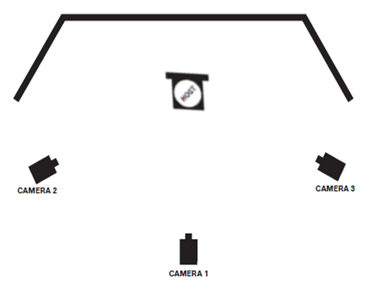

Notifying the person captured in the camera (Access to public database is needed), as well as authorities.
Using heat sensors to detect a relation between the temperature and the known factors to provide a more accurate risk value.
With the knowledge of risk in various areas, creating a path or a route that has the least risk possible.
